In [1]:
import os

dir_path = r'archive'
count = 0

for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

test=[]
for i in range(1,count+1):
    with open(f"archive/{i}.txt", "r", encoding="utf-8") as f:
        testi= f.read()
        test.append(testi)
# print (test[11])

# all_text = test1 + "\n" + test2

File count: 12


In [2]:
# import re
# full_text = "".join(test)
# exercises =[]

# #split by(Α1.,Α2.,,Δ5.)
# chapter_splits = re.split(r'(?=^(?:[Α-Δ]\d+\.|Θέμα\s+[Α-Ω]))', full_text)

# #re.split keeps the separators, so combine chapter code + its text
# for i in range(1, len(chapter_splits), 2):
#     chapter_code = chapter_splits[i].strip()      #"Α1."
#     chapter_text = chapter_splits[i+1].strip()
#     if len(chapter_text) > 0 and re.search(r'\w', chapter_text):
#         exercises.append(chapter_code + " " + chapter_text)# text until next chapter


# all_subquestions = []

# for ex in exercises:
#     subqs = re.split(r'\n\d\.\s', ex)[1:]  # skip header
#     ex_code = ex.split()[0]  # e.g., "Α1."
#     for i, sq in enumerate(subqs, start=1):
#         all_subquestions.append(f"{ex_code}.{i} {sq.strip()}")

In [3]:
# print(exercises[11])

In [4]:
import re

full_text = "".join(test)
exercises = []

#split at (α1.) or (thema χ)
parts= re.split(
    r'(?=^(?:[Α-Δ]\d+\.|Θ[ΕΕ]ΜΑ\s+[Α-Ω]))',
    full_text,
    flags=re.MULTILINE
)

for part in parts:
    part = part.strip()
    if not part:
        continue

    #if thema
    if re.match(r'^Θ[ΕΕ]ΜΑ\s+[Α-Ω]', part):
        #split
        lines = part.splitlines()
        #keep only if its description
        content_lines= [line for line in lines[1:] if re.search(r'\w', line)]
        if content_lines:
            exercises.append(part)
        else:
            #else skip it
            continue
    else:
        #a1.a2.a3..
        exercises.append(part)


In [5]:
print(exercises[18])

Δ5. Να κατασκευάσετε τη συνάρτηση ΒΑΘΜΟΣ, η οποία θα δέχεται ως
παραμέτρους:
- τον πίνακα ΑΠ[100,30].
- τον πίνακα ΣΑ[30].
- έναν αριθμό που αντιστοιχεί σε μια γραμμή του πίνακα ΑΠ[100,30]
και θα επιστρέφει τη συνολική βαθμολογία του αντίστοιχου μαθητή.
Μονάδες 6ΘΕΜΑ Α


In [6]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(exercises, convert_to_tensor=True)

In [7]:
similarity_matrix = util.cos_sim(embeddings, embeddings)
threshold =0.76
clusters=[]
used=set()

for i,e in enumerate(exercises):
    if i in used:
        continue
    cluster = [e]
    used.add(i)
    for j in range(i+1, len(exercises)):
        if similarity_matrix[i][j] > threshold:
            cluster.append(exercises[j])
            used.add(j)
    clusters.append(cluster)

clusters.sort(key=lambda x: len(x), reverse=True)

# for cluster in clusters:
#     print(f"Appears {len(cluster)} time(s):")
#     print(cluster[0])


In [8]:
# for cluster in clusters:
#     print(f"Appears {len(cluster)} time(s):")
#     for ex in cluster:
#         print(ex)
#     print("....................")

In [9]:
# for ex in exercises:
#     if ex.startswith("Δ1."):
#         print("====")
#         print(ex) debug

In [10]:
themes = {
    "matrices": ["πίνακ","πινάκ" ,"μονοδιάστατ", "δισδιάστατ"],
    "lists_queue_stack_theory": ["λιστ","λίστ", "δομή", "στοίβα", "ουρά", "δυναμική δομή"],
    "graphs_theory": ["γράφος", "ακμή", "προσπέλαση","δένρο","δέντρο","κόμβ"],
    "write_program": ["να γραφεί αλγόριθμος","να αναπτύξετε πρόγραμμα σε γλωσσα","να γραφεί πρόγραμμα", "να γράψετε πρόγραμμα","να αναπτύξετε τμήμα προγράμματος" ,
                      "να κατασκευάσετε πρόγραμμα", "ψευδοκώδικα","να περιλαμβάνει κατάλληλο τμήμα δηλώσεων","να περιλαμβάνει τμήμα δηλώσεων",
                      "να αναπτύξετε αλγόριθμο","να αναπτύξετε αλγόριθμο ο οποίος","να αναπτύξετε πρόγραμμα σε γλωσσα, το οποίο",
                      "να αναπτύξετε πρόγραμμα σε γλωσσα το οποίο","να διαβάζει","να εμφανίζει","να υπολογίζει","να τερματίζ"],
    "flowchart": ["διάγραμμα ροής","ροής"],
    "fillin":["Να γράψετε στο τετράδιό σας τους αριθμούς (1) έως () που αντιστοιχούν στα κενά του παρακάτω τμήματος προγράμματος", "κενά"],
    "subprograms":["α αναπτύξετε συνάρτηση","υποπρόγραμμα","α κατασκευάσετε τη συνάρτηση","α κατασκευάσετε το υποπρόγραμμα","α κατασκευαστεί η συνάρτησ"],
    "oop":["κλάσ" , "αντικείμεν","αντικειμέν"],
    "matching":["αντιστοιχ","αντοιστοίχ"],
    "same_structure":["α μετατραπεί σε ισοδύναμο","να μετατραπεί το παραπάνω τμήμα προγράμματος","να ξαναγράψετε το παραπάνω απόσπασμα αλγορίθμου"],
    "errors":["συντακτικά λάθη", "λογικά λάθη", "να εντοπίσετε τα λάθη","λάθη"],
    "write_theory":["να αναφέρετε" , "επιγραμματικά" , "ονομαστικά","ορισμό"]
    
}

In [11]:
def classify_exercise(text):
    text_lower = text.lower().replace("\n", " ")
    labels = []
    for theme, keywords in themes.items():
        if any(kw in text_lower for kw in keywords):
            labels.append(theme)
    if not labels:
        labels.append("other")
    return labels[:3]


In [17]:
all_themes=[]

for i in range(len(exercises)):
    if re.match(r'^\s*Α1[\.: ]', exercises[i]):
        continue 
    classification = classify_exercise(exercises[i])
    #print(classify_exercise(exercises[i]), exercises[i])
    #all_themes.extend(classify_exercise(exercises[i]))
    all_themes.append({
        "exercise": exercises[i],
        "classification": classification
    })

# print(len(all_themes), len(exercises))
# print(all_themes, len(exercises))
# print(classify_exercise(exercises[18]),exercises[18])

In [13]:
# all_tests = []
# for filename in sorted(os.listdir(dir_path)):
#     if filename.endswith(".txt"):
#         with open(os.path.join(dir_path, filename), "r", encoding="utf-8") as f:
#             all_tests.append(f.read())

for test_idx, test_text in enumerate(test, start=1):
    #all A1 exercises (assumes "Α1." starts the section)
    a1= re.findall(r'(Α1\..*?)(?=\nΑ[2-5]\.|$)', test_text, flags=re.DOTALL)

    for a1_text in a1:
        print(f"Test {test_idx} - A1:")
        #subquestions 1. 2. 3. ...
        subquestions = re.split(r'\n\d\.\s', a1_text)[1:]  #noheader
        for i, sq in enumerate(subquestions, start=1):
            themes_found = classify_exercise(sq)
            print(f"  A1.{i}: {themes_found}")
            #all_themes.extend(themes_found)
            all_themes.append({
                "exercise": sq,
                "classification": themes_found
            })
            
#         print("-------------------------------------------------")


# print(len(all_themes))

Test 1 - A1:
  A1.1: ['matrices']
  A1.2: ['other']
  A1.3: ['oop']
  A1.4: ['other']
  A1.5: ['other']
Test 2 - A1:
  A1.1: ['oop']
  A1.2: ['graphs_theory']
  A1.3: ['oop']
  A1.4: ['lists_queue_stack_theory']
  A1.5: ['oop']
Test 3 - A1:
  A1.1: ['other']
  A1.2: ['lists_queue_stack_theory']
  A1.3: ['other']
  A1.4: ['other']
  A1.5: ['lists_queue_stack_theory']
Test 4 - A1:
  A1.1: ['other']
  A1.2: ['other']
  A1.3: ['other']
  A1.4: ['lists_queue_stack_theory']
  A1.5: ['other']
Test 5 - A1:
  A1.1: ['errors']
  A1.2: ['lists_queue_stack_theory']
  A1.3: ['other']
  A1.4: ['other']
  A1.5: ['lists_queue_stack_theory']
Test 6 - A1:
  A1.1: ['other']
  A1.2: ['lists_queue_stack_theory', 'errors']
  A1.3: ['lists_queue_stack_theory']
  A1.4: ['matrices']
  A1.5: ['other']
Test 7 - A1:
  A1.1: ['matrices']
  A1.2: ['other']
  A1.3: ['other']
  A1.4: ['other']
  A1.5: ['other']
Test 8 - A1:
  A1.1: ['other']
  A1.2: ['matrices']
  A1.3: ['other']
  A1.4: ['other']
  A1.5: ['matrices'

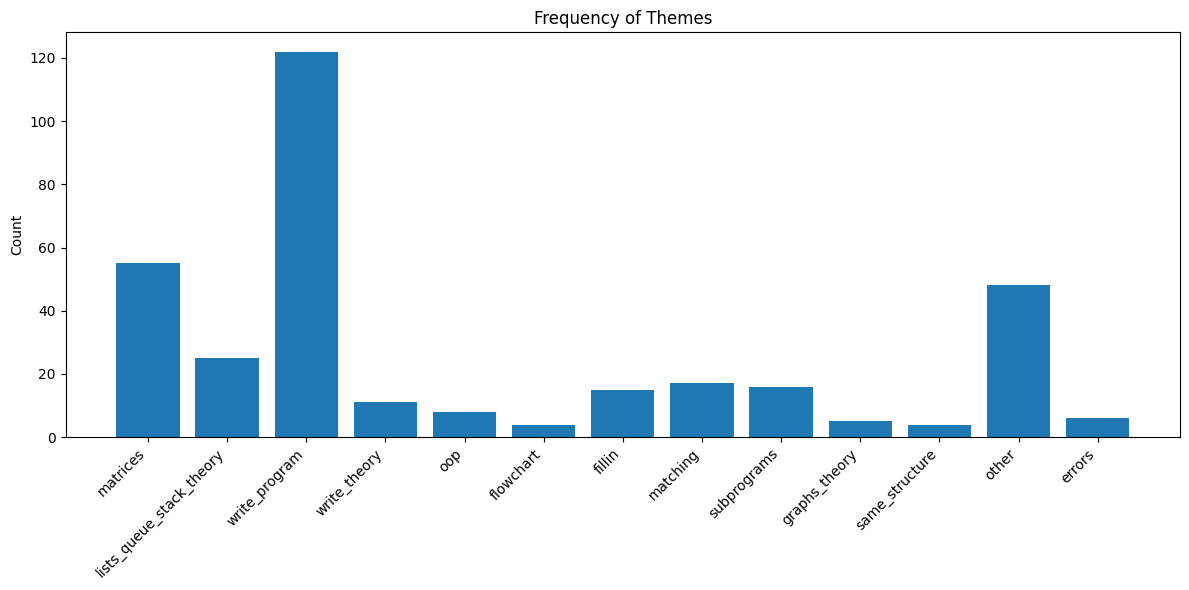

In [14]:
import collections
import matplotlib.pyplot as plt

all_theme_names= []
for item in all_themes:
    all_theme_names.extend(item["classification"])  # get the list of themes


#frequencies
freq=collections.Counter(all_theme_names)

labels = list(freq.keys())
values = list(freq.values())

plt.figure(figsize=(12, 6))
plt.bar(labels, values)
plt.xticks(rotation=45, ha="right")
plt.title("Frequency of Themes")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [16]:
other_exercises= [item for item in all_themes if "subprograms" in item["classification"]]
print(len(other_exercises))
# for ex in other_exercises:
#     print("Exercise:", ex["exercise"])
#     print("Classification:", ex["classification"])
#     print("-------------------------------------------------")


16
